In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
"""Attributes:

Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

"""

'Attributes:\n\nDataset information:\n\nThis dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\nSeveral constraints were placed on the selection of these instances from a larger database. \nIn particular, all patients here are females at least 21 years old of Pima Indian heritage.\n\n\nPregnancies: Number of times pregnant\n\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\n\nBloodPressure: Diastolic blood pressure (mm Hg)\n\nSkinThickness: Triceps skin fold thickness (mm)\n\nInsulin: 2-Hour serum insulin (mu U/ml)\n\nBMI: Body mass index (weight in kg/(height in m)^2)\n\nDiabetesPedigreeFunction: Diabetes pedigree function\n\nAge: Age (years)\n\nOutcome: Class variable (0 or 1)\n\n'

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 Number of times pregnant        768 non-null int64
 Plasma glucose concentration    768 non-null int64
 Diastolic blood pressure        768 non-null int64
 Triceps skin fold thickness     768 non-null int64
 2-Hour serum insulin            768 non-null int64
 Body mass index                 768 non-null float64
 Diabetes pedigree function      768 non-null float64
 Age (years)                     768 non-null int64
 Class variable                  768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
dataset.isna().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [8]:
dataset.columns= dataset.columns.str.replace(' ','_')

In [9]:
dataset.columns

Index(['_Number_of_times_pregnant', '_Plasma_glucose_concentration',
       '_Diastolic_blood_pressure', '_Triceps_skin_fold_thickness',
       '_2-Hour_serum_insulin', '_Body_mass_index',
       '_Diabetes_pedigree_function', '_Age_(years)', '_Class_variable'],
      dtype='object')

In [10]:
corr = dataset.corr()
corr

,_Number_of_times_pregnant,_Plasma_glucose_concentration,_Diastolic_blood_pressure,_Triceps_skin_fold_thickness,_2-Hour_serum_insulin,_Body_mass_index,_Diabetes_pedigree_function,_Age_(years)
_Number_of_times_pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
_Plasma_glucose_concentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
_Diastolic_blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
_Triceps_skin_fold_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
_2-Hour_serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
_Body_mass_index,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
_Diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
_Age_(years),0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [11]:
dataset= pd.get_dummies(dataset,columns=['_Class_variable'],drop_first=True)

In [12]:
dataset.head()

,_Number_of_times_pregnant,_Plasma_glucose_concentration,_Diastolic_blood_pressure,_Triceps_skin_fold_thickness,_2-Hour_serum_insulin,_Body_mass_index,_Diabetes_pedigree_function,_Age_(years),_Class_variable_YES
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


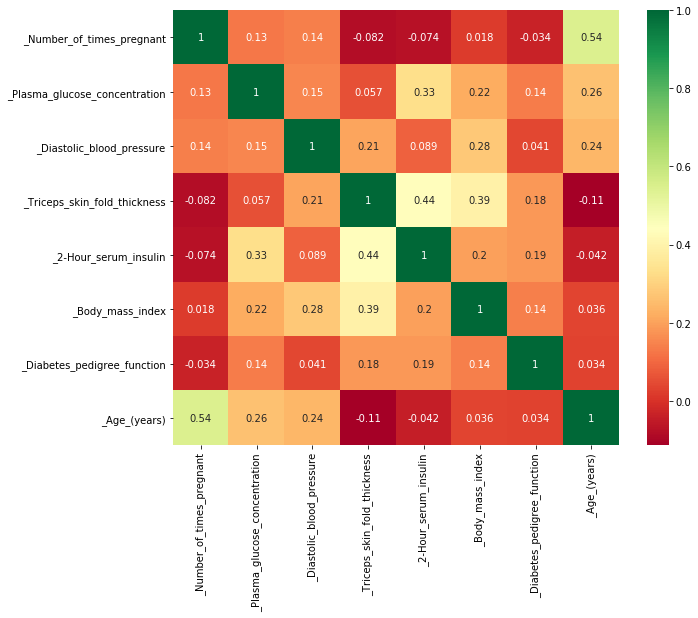

In [13]:

sns.heatmap(dataset[dataset.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

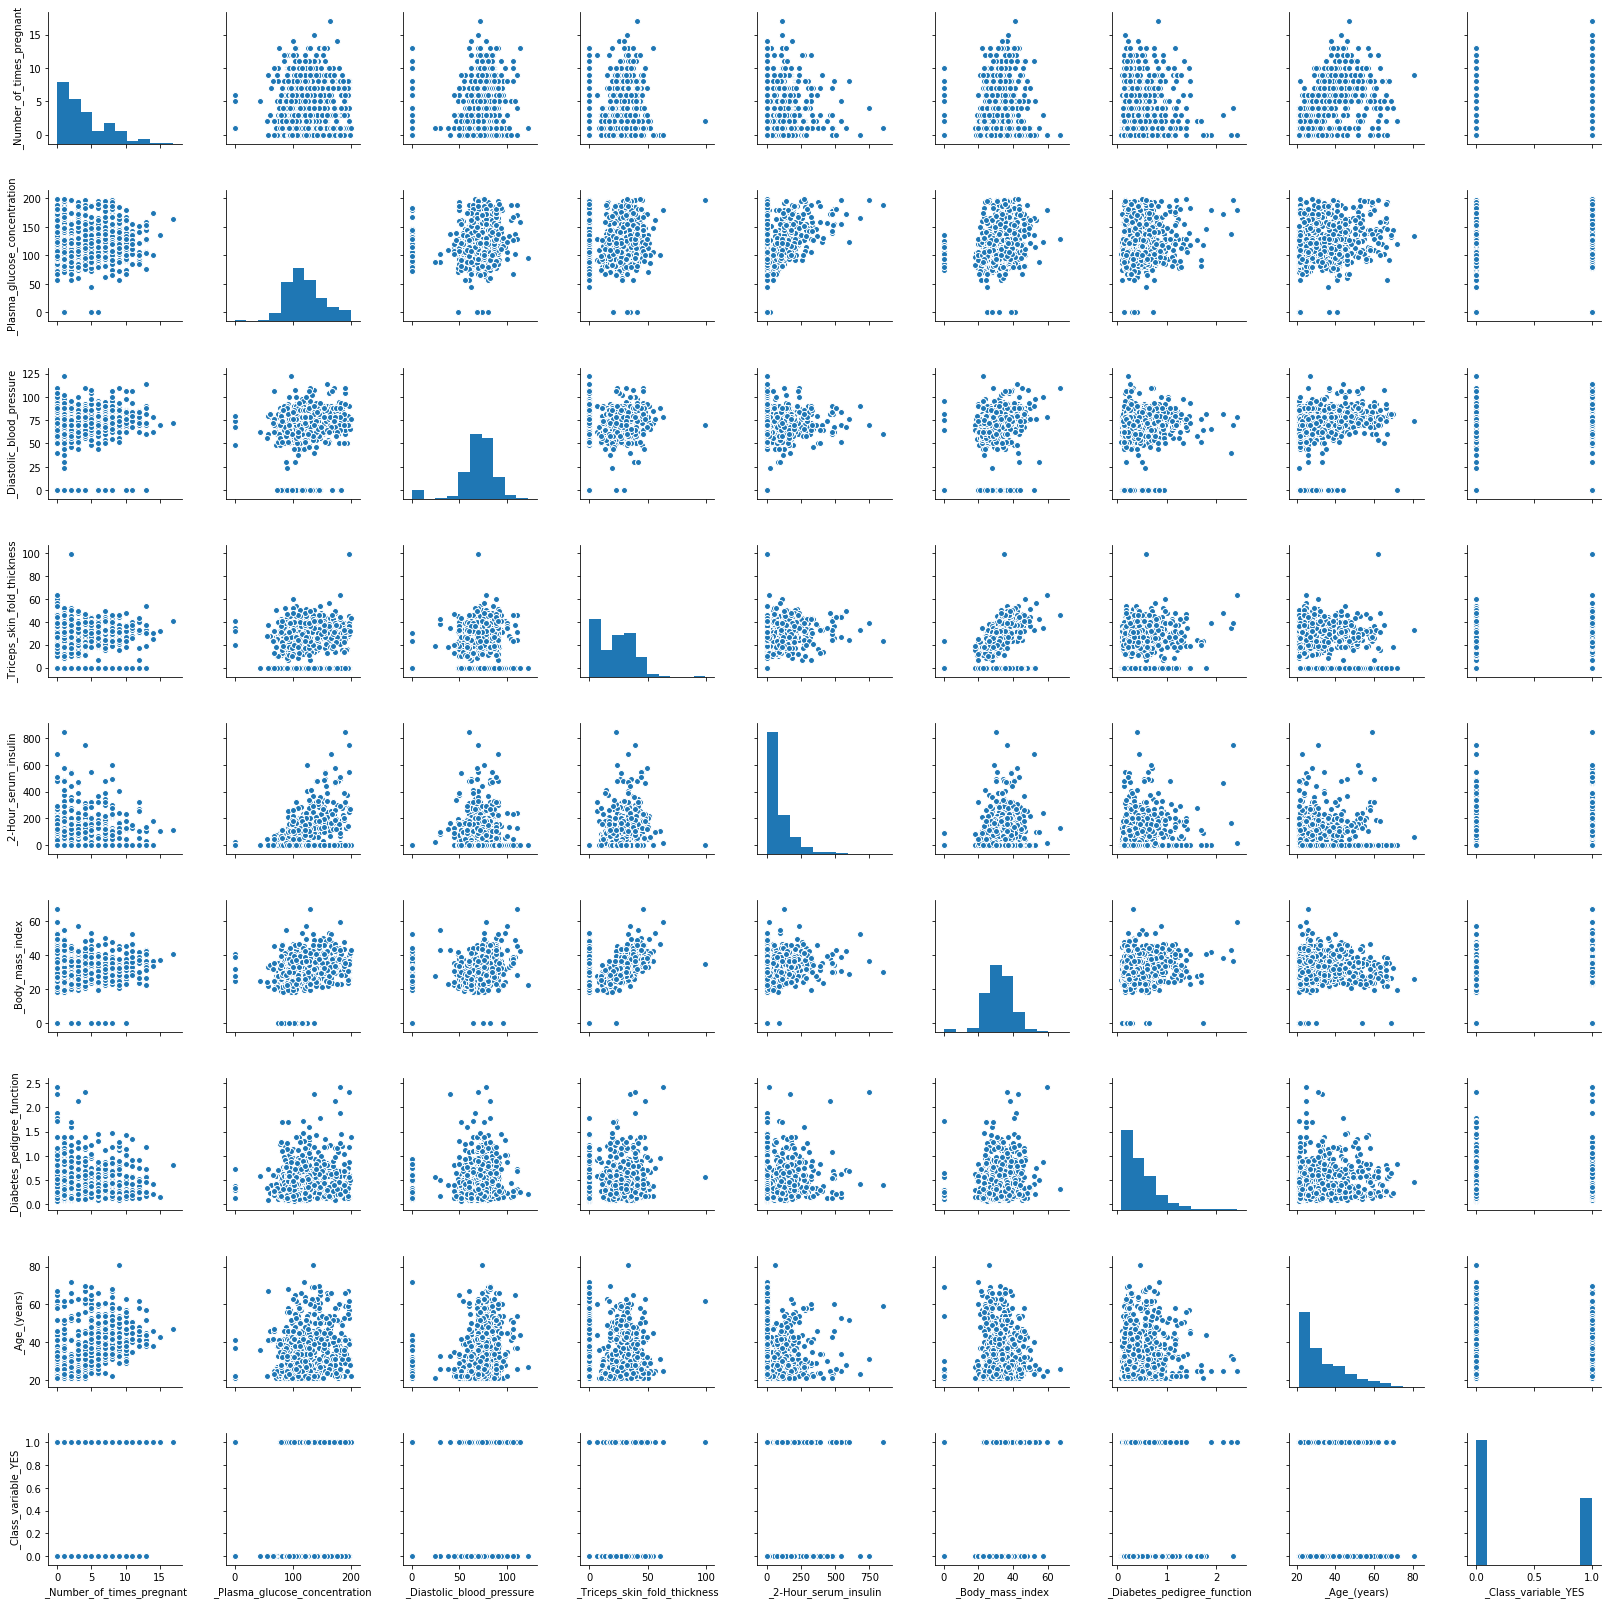

In [14]:
sns.pairplot(dataset)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
_Number_of_times_pregnant        768 non-null int64
_Plasma_glucose_concentration    768 non-null int64
_Diastolic_blood_pressure        768 non-null int64
_Triceps_skin_fold_thickness     768 non-null int64
_2-Hour_serum_insulin            768 non-null int64
_Body_mass_index                 768 non-null float64
_Diabetes_pedigree_function      768 non-null float64
_Age_(years)                     768 non-null int64
_Class_variable_YES              768 non-null uint8
dtypes: float64(2), int64(6), uint8(1)
memory usage: 48.8 KB


In [16]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [22]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))

0.8020833333333334


In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[105,  25],
       [ 18,  44]], dtype=int64)

In [25]:
print(metrics.accuracy_score(y_pred,y_test))

0.7760416666666666


In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[110,  20],
       [ 33,  29]], dtype=int64)

In [28]:
print(metrics.accuracy_score(y_pred,y_test))

0.7239583333333334


In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[117,  13],
       [ 25,  37]], dtype=int64)

In [31]:
print(metrics.accuracy_score(y_pred,y_test))

0.8020833333333334
